<span style="color:red;font-size:2em;font-weight:bold"> PARTIE 1 - Analyse exploratoire et identification des insights</span>

<span style="color:blue;font-size:1.5em;font-weight:bold;background-color:yellow"> Modules </span>

In [1]:
# Roots
import numpy as np
import pandas as pd
# import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Stats
from scipy.stats import skew, kurtosis, zscore, chi2_contingency, f_oneway, chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Sert à éviter les Warnings avec les transformations sur des vues en transformant 
# ces warning en erreur obligeant ainsi à ne travailler que sur des copies ou les originaux.

pd.set_option('mode.chained_assignment','raise')

In [3]:
# Module pour recharger un module sans redemarrer le kernel
# import importlib
%load_ext autoreload
%autoreload 2

In [4]:
# Ajoute le dossier utils au sys.path. Remarque ne pas oublier le __init__.py dans le dossier utils
import sys
utils_path = Path.cwd().parent/"utils"
sys.path.append(str(utils_path))
# Fonctions personnelles
from filtering_counters import cleaning_counter, cleaning_results, removedAndAdded_col # Suivi des filtrage des features et observations
from plotting import create_fig, make_figure, graphs#, graph_hyperParamEffect, graph_importance # Fonctions de plotting
from correlation import graphs_corr, CorrCouples_VIF, chi2_test, anova_test # Fonctions de correlation
from misc import features_types, data_props, top_score, iqr_outliers,zmad_outliers # Divers fonctions

In [5]:
# Paramètres

# Création dossier results
save_path = Path.cwd().parent.joinpath('datas/results')
Path.mkdir(save_path,exist_ok = True)

# choix de sauvegarde pour la data Xy
yes_choice = {'YES','yes','y','Y'}
save_datas = "y"

# Choix de sauvegarde pour les graphes
save_graphs = True

<span style="color:blue;font-size:1.5em;font-weight:bold;background-color:yellow"> Datasets </span>

In [6]:
# Importation des documents
extrait_sirh = pd.read_csv('../datas/extrait_sirh.csv')
extrait_eval = pd.read_csv('../datas/extrait_eval.csv')
extrait_sondage = pd.read_csv('../datas/extrait_sondage.csv')

<span style="color:blue;font-size:1.5em;font-weight:bold;background-color:yellow"> Description globale </span>

In [7]:
print('-------------SIRH------------')
display(extrait_sirh.head())
print('-------------EVAL------------')
display(extrait_eval.head())
print('-------------SONDAGE------------')
display(extrait_sondage.head())

-------------SIRH------------


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


-------------EVAL------------


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


-------------SONDAGE------------


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [8]:
print('-------------SIRH------------')
display(extrait_sirh.info())
print('-------------EVAL------------')
display(extrait_eval.info())
print('-------------SONDAGE------------')
display(extrait_sondage.info())

-------------SIRH------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), objec

None

-------------EVAL------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int

None

-------------SONDAGE------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous

None

In [9]:
display(extrait_sirh['id_employee'])
display(extrait_eval['eval_number'])
display(extrait_sondage['code_sondage'])

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: id_employee, Length: 1470, dtype: int64

0          E_1
1          E_2
2          E_4
3          E_5
4          E_7
         ...  
1465    E_2061
1466    E_2062
1467    E_2064
1468    E_2065
1469    E_2068
Name: eval_number, Length: 1470, dtype: object

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: code_sondage, Length: 1470, dtype: int64

3 fichiers csv fournis, chaque ligne correspond à un employé. Il y a 1470 observations (=1470 employés ayant démissioné ou non): 
- extrait_sirh: profil employé + informations personnelles
- extrait_eval: Note évaluateur + Notes de satisfaction employé + Heure supp effectuée + Augmentation précédente accordée
- extrait_sondage: Démission + informations personnelles complémentaires + Situation hiérarchique
Plusieurs informations personnelles sont relevées (age, genre, statut maritale, a des enfants... RGPD?).
**L'identifiant employé ne se trouve que dans le SIRH mais on a son equivalent dans l'EVAL avec la colonne eval_number et code_sondage dans SONDAGE. ==> On va merger suivant ces colonnes comme référence.**  

<span style="color:blue;font-size:1.5em;font-weight:bold;background-color:yellow"> Jointure des fichiers </span>

In [10]:
# on doit changer le format de eval_number
extrait_eval['eval_number'] = extrait_eval['eval_number'].apply(lambda x: int(x.split("_")[1]))
extrait_eval

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,1,3,Oui,11 %
1,3,2,2,2,4,3,2,4,Non,23 %
2,4,2,1,3,2,3,4,3,Oui,15 %
3,4,3,1,3,3,3,5,3,Oui,11 %
4,1,3,1,2,4,3,7,3,Non,12 %
...,...,...,...,...,...,...,...,...,...,...
1465,3,4,2,4,3,3,2061,3,Non,17 %
1466,4,2,3,1,1,3,2062,3,Non,15 %
1467,2,4,2,2,2,3,2064,4,Oui,20 %
1468,4,2,2,2,4,2,2065,3,Non,14 %


In [11]:
# df_central = pd.concat([extrait_sirh,extrait_eval,extrait_sondage], axis=1) # Risqué
df_central = extrait_sirh.merge(extrait_eval, left_on='id_employee', right_on='eval_number').merge(extrait_sondage,left_on='eval_number', right_on='code_sondage')
# Ou extrait_sirh.join([extrait_eval,extrait_sondage]) mais moins explicite que concat(axis=1) et version simplifiée de merge
display(df_central)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,M,2571,Marié(e),Consulting,Consultant,4,80,17,...,3,1,2061,23,2,Transformation Digitale,Y,Frequent,0,3
1466,2062,39,M,9991,Marié(e),Consulting,Manager,4,80,9,...,5,1,2062,6,1,Transformation Digitale,Y,Occasionnel,1,7
1467,2064,27,M,6142,Marié(e),Consulting,Tech Lead,1,80,6,...,0,1,2064,4,3,Infra & Cloud,Y,Occasionnel,0,3
1468,2065,49,M,5390,Marié(e),Commercial,Cadre Commercial,2,80,17,...,3,1,2065,2,3,Transformation Digitale,Y,Frequent,0,8


<span style="color:purple;font-weight:bold"> Compteur </span>

In [12]:
# On va considérer le filtrage à partir d'ici (même si on a deja enlever eval_number et code_sondage)
cleaning_ref = cleaning_counter(df_central = df_central)
cleaning_ref

{'df_central': (1470, 34)}

In [13]:
# On peut retirer eval et code
df_central = df_central.drop(columns=['eval_number','code_sondage'])

<span style="color:purple;font-weight:bold"> Miniaturisation des valeurs catégorielles </span>

In [14]:
# Passage des features catégorielles en minuscule
df_central = df_central.apply(lambda col: col.str.lower() if col.dtype == "object" else col)
df_central

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,80,8,...,0,0,1,1,2,infra & cloud,y,occasionnel,0,5
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,80,10,...,1,3,1,8,1,infra & cloud,y,frequent,1,7
2,4,37,m,2090,célibataire,consulting,consultant,6,80,7,...,0,3,1,2,2,autre,y,occasionnel,0,0
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,80,8,...,0,3,1,3,4,infra & cloud,y,frequent,3,0
4,7,27,m,3468,marié(e),consulting,consultant,9,80,6,...,1,3,1,2,1,transformation digitale,y,occasionnel,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,m,2571,marié(e),consulting,consultant,4,80,17,...,1,3,1,23,2,transformation digitale,y,frequent,0,3
1466,2062,39,m,9991,marié(e),consulting,manager,4,80,9,...,1,5,1,6,1,transformation digitale,y,occasionnel,1,7
1467,2064,27,m,6142,marié(e),consulting,tech lead,1,80,6,...,1,0,1,4,3,infra & cloud,y,occasionnel,0,3
1468,2065,49,m,5390,marié(e),commercial,cadre commercial,2,80,17,...,0,3,1,2,3,transformation digitale,y,frequent,0,8


<span style="color:red;font-weight:bold"> Transformation en int binaire les démissions </span>

In [15]:
# Transformation de la feature a_quitte_l_entreprise en int
df_central['a_quitte_l_entreprise'] = df_central['a_quitte_l_entreprise'].apply(
    lambda val: 1 if val == "oui" else 0)

<span style="color:purple;font-weight:bold"> Transformation en entier des augmentations </span>

In [16]:
# Transformation de la feature augementation_salaire_precedente en int
df_central['augementation_salaire_precedente'] = df_central['augementation_salaire_precedente'].apply(
    lambda val: int(val.split(' ')[0]) )

In [17]:
df_central.nunique().sort_values(ascending=False)

id_employee                                  1470
revenu_mensuel                               1349
age                                            43
annee_experience_totale                        40
annees_dans_l_entreprise                       37
distance_domicile_travail                      29
annees_dans_le_poste_actuel                    19
annes_sous_responsable_actuel                  18
annees_depuis_la_derniere_promotion            16
augementation_salaire_precedente               15
nombre_experiences_precedentes                 10
poste                                           9
nb_formations_suivies                           7
domaine_etude                                   6
niveau_hierarchique_poste                       5
niveau_education                                5
satisfaction_employee_equilibre_pro_perso       4
nombre_participation_pee                        4
note_evaluation_precedente                      4
satisfaction_employee_equipe                    4


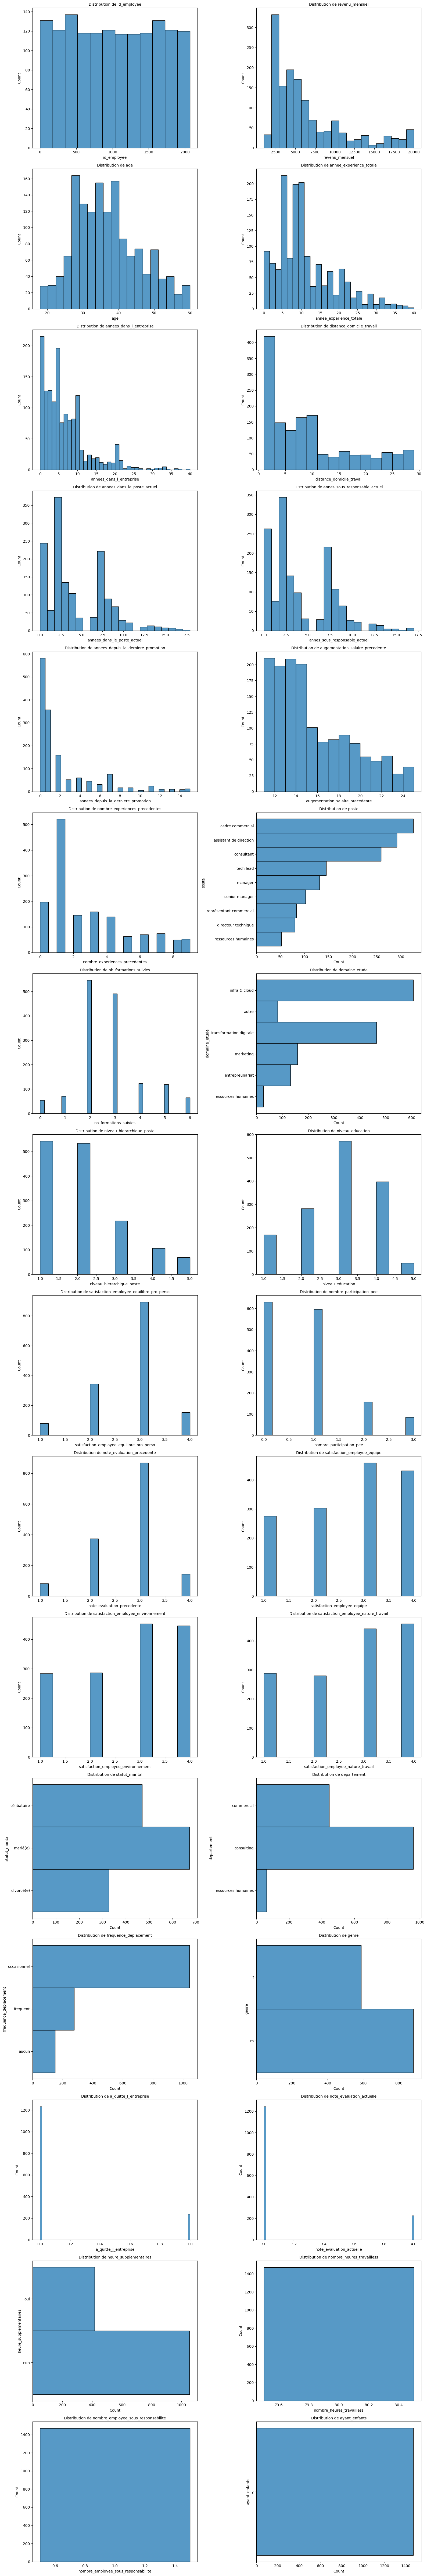

In [18]:
make_figure(df_central,
            x=None,
            kind='hist',
            ycols=df_central.nunique().sort_values(ascending=False).index.tolist()
           )
plt.show()

**Diparité entre les employés:**  
- Très forte cardinalité sur revenu_mensuel avec concentration des salaires autour de 2500 (euros?) et étalement vers les salaires plus elevé (leptokurtic + asymétrie droite)
- Relativement forte cardinalité sur age, annee_experience_totale, annees_dans_l_entreprise, distance_domicile_travail, annees_dans_le_poste_actuel, annes_sous_responsable_actuel, annees_depuis_la_derniere_promotion, augementation_salaire_precedente, nombre_experiences_precedentes. Leptokurticisme et asymétrie par la droite plus ou moins prononcée suivant les features.
- 

On va regarder un peu plus en détail:
- statut_marital: 3 valeurs différentes
- poste: 9 types de postes existants
- nombre_heures_travailless: 1 seule valeur
- satisfaction_employee_environnement / note_evaluation_precedente / satisfaction_employee_nature_travail / satisfaction_employee_equipe / satisfaction_employee_equilibre_pro_perso: 4 valeurs chacune
- **nombre_participation_pee: ???**
- nombre_employee_sous_responsabilite: 1 seule valeur
- ayant_enfants: 1 seule valeur

<span style="color:purple;font-weight:bold"> Checking de features particuliers </span>

- **nombre_heures_travailless** : tout le monde fait 80h/sem?
- La satisfaction de l'employée est notée de 1 à 4, en supposant que 1 est la pire note, à part pour l'equilibre pro/perso, il y a toujours environ 280 personnes insatisfaites.
- note_evaluation_actuelle retourne seulement des notes entre 3 et 4 alors que note_evaluation_precedente comptait encore environ 450 personnes ayant moins de 3.
- nombre_participation_pee:...qu'est ce que c'est? En tout cas presque la moitiée n'y ont pas participé ($\approx 42\%$ par rapport aux 1470)
- **nombre_employee_sous_responsabilite**: toujours 1 sous-entendu sois-même??
- **ayant_enfants**: toujours Y, pourtant tranche d'age allant de 18 à 60 ans...

On va enlever les colonnes a valeur unitaire car pas d'utilité à priori 

In [20]:
df_central_clean = df_central.drop(columns=[
    'nombre_heures_travailless',
    'nombre_employee_sous_responsabilite',
    'ayant_enfants'
])

In [21]:
df_central_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
id_employee,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
revenu_mensuel,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
nombre_experiences_precedentes,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
annee_experience_totale,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
annees_dans_l_entreprise,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0
annees_dans_le_poste_actuel,1470.0,4.229252,3.623137,0.0,2.00,3.0,7.00,18.0
satisfaction_employee_environnement,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
note_evaluation_precedente,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
niveau_hierarchique_poste,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [22]:
df_central_clean.loc[df_central_clean['a_quitte_l_entreprise']==1].describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,...,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1010.345992,33.607595,4787.092827,2.940928,8.244726,5.130802,2.902954,2.464135,2.518987,1.637131,...,2.658228,3.156118,15.097046,1.0,0.527426,2.624473,10.632911,2.839662,1.945148,2.852321
std,580.750572,9.689350,3640.210367,2.678519,7.169204,5.949984,3.174827,1.169791,0.773405,0.940594,...,0.816453,0.363735,3.770294,0.0,0.856361,1.254784,8.452525,1.008244,3.153077,3.143349
min,1.000000,18.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,11.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,514.000000,28.000000,2373.000000,1.000000,3.000000,1.000000,0.000000,1.000000,2.000000,1.000000,...,2.000000,3.000000,12.000000,1.0,0.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,1017.000000,32.000000,3202.000000,1.000000,7.000000,3.000000,2.000000,3.000000,3.000000,1.000000,...,3.000000,3.000000,14.000000,1.0,0.000000,2.000000,9.000000,3.000000,1.000000,2.000000
75%,1486.000000,39.000000,5916.000000,5.000000,10.000000,7.000000,4.000000,4.000000,3.000000,2.000000,...,3.000000,3.000000,17.000000,1.0,1.000000,3.000000,17.000000,4.000000,2.000000,5.000000
max,2055.000000,58.000000,19859.000000,9.000000,40.000000,40.000000,15.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,25.000000,1.0,3.000000,6.000000,29.000000,5.000000,15.000000,14.000000


In [23]:
df_central_clean.loc[df_central_clean['annee_experience_totale']>= 40]

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
126,165,58,f,10312,marié(e),consulting,manager,1,40,40,...,12,1,1,3,23,4,transformation digitale,occasionnel,15,6
595,825,58,m,19246,célibataire,consulting,directeur technique,7,40,31,...,12,1,0,2,2,4,infra & cloud,occasionnel,13,8


- 237 personnes sont parties à ce jour soit $16.12\%$ et parmi elles, les personnes avec le plus d'expérience, le plus d'années d'expériences et même le plus d'années dans l'entreprise. CEPENDANT, même si le nombre de personne insatisfait $\approx$ pareil ( environ 280), la moitiée des démissionnaires notait au moins 3 en terme de satisfaction globale ==> ***Tous les insatisfait ne sont pas partis + les personnes satisfaites sont tou de même enclin à partir.***  
- Distribution symétrique de l'age ($moyenne \approx médiane$ iqr + ecart-type acceptable)
- Forte disparité au niveau du salaire avec un écart-type supérieure à la médiane
- ***La moitiée des employées qui ont quittés l'entreprise n'ont connues que cette entreprise dans leur expérience***
- **La note actuelle des démissionnaires est bonne (médiane de 3) à excellente**


<span style="color:blue;font-size:1.5em;font-weight:bold;background-color:yellow"> Outliers </span>

In [24]:
summary, df_outliers_iqr = iqr_outliers(df_central_clean[[
    'age',
    'revenu_mensuel',
    'nombre_experiences_precedentes',
    'annee_experience_totale',
    'annees_dans_l_entreprise',
    'annees_dans_le_poste_actuel',
    'augementation_salaire_precedente',
    'distance_domicile_travail',
    'annees_depuis_la_derniere_promotion',
    'annes_sous_responsable_actuel'
]])
summary.loc[summary['nb_outliers']>0].sort_values(by='nb_outliers',ascending=False)

,feature,nb_outliers
1,revenu_mensuel,114
8,annees_depuis_la_derniere_promotion,107
4,annees_dans_l_entreprise,104
3,annee_experience_totale,63
2,nombre_experiences_precedentes,52
5,annees_dans_le_poste_actuel,21
9,annes_sous_responsable_actuel,14


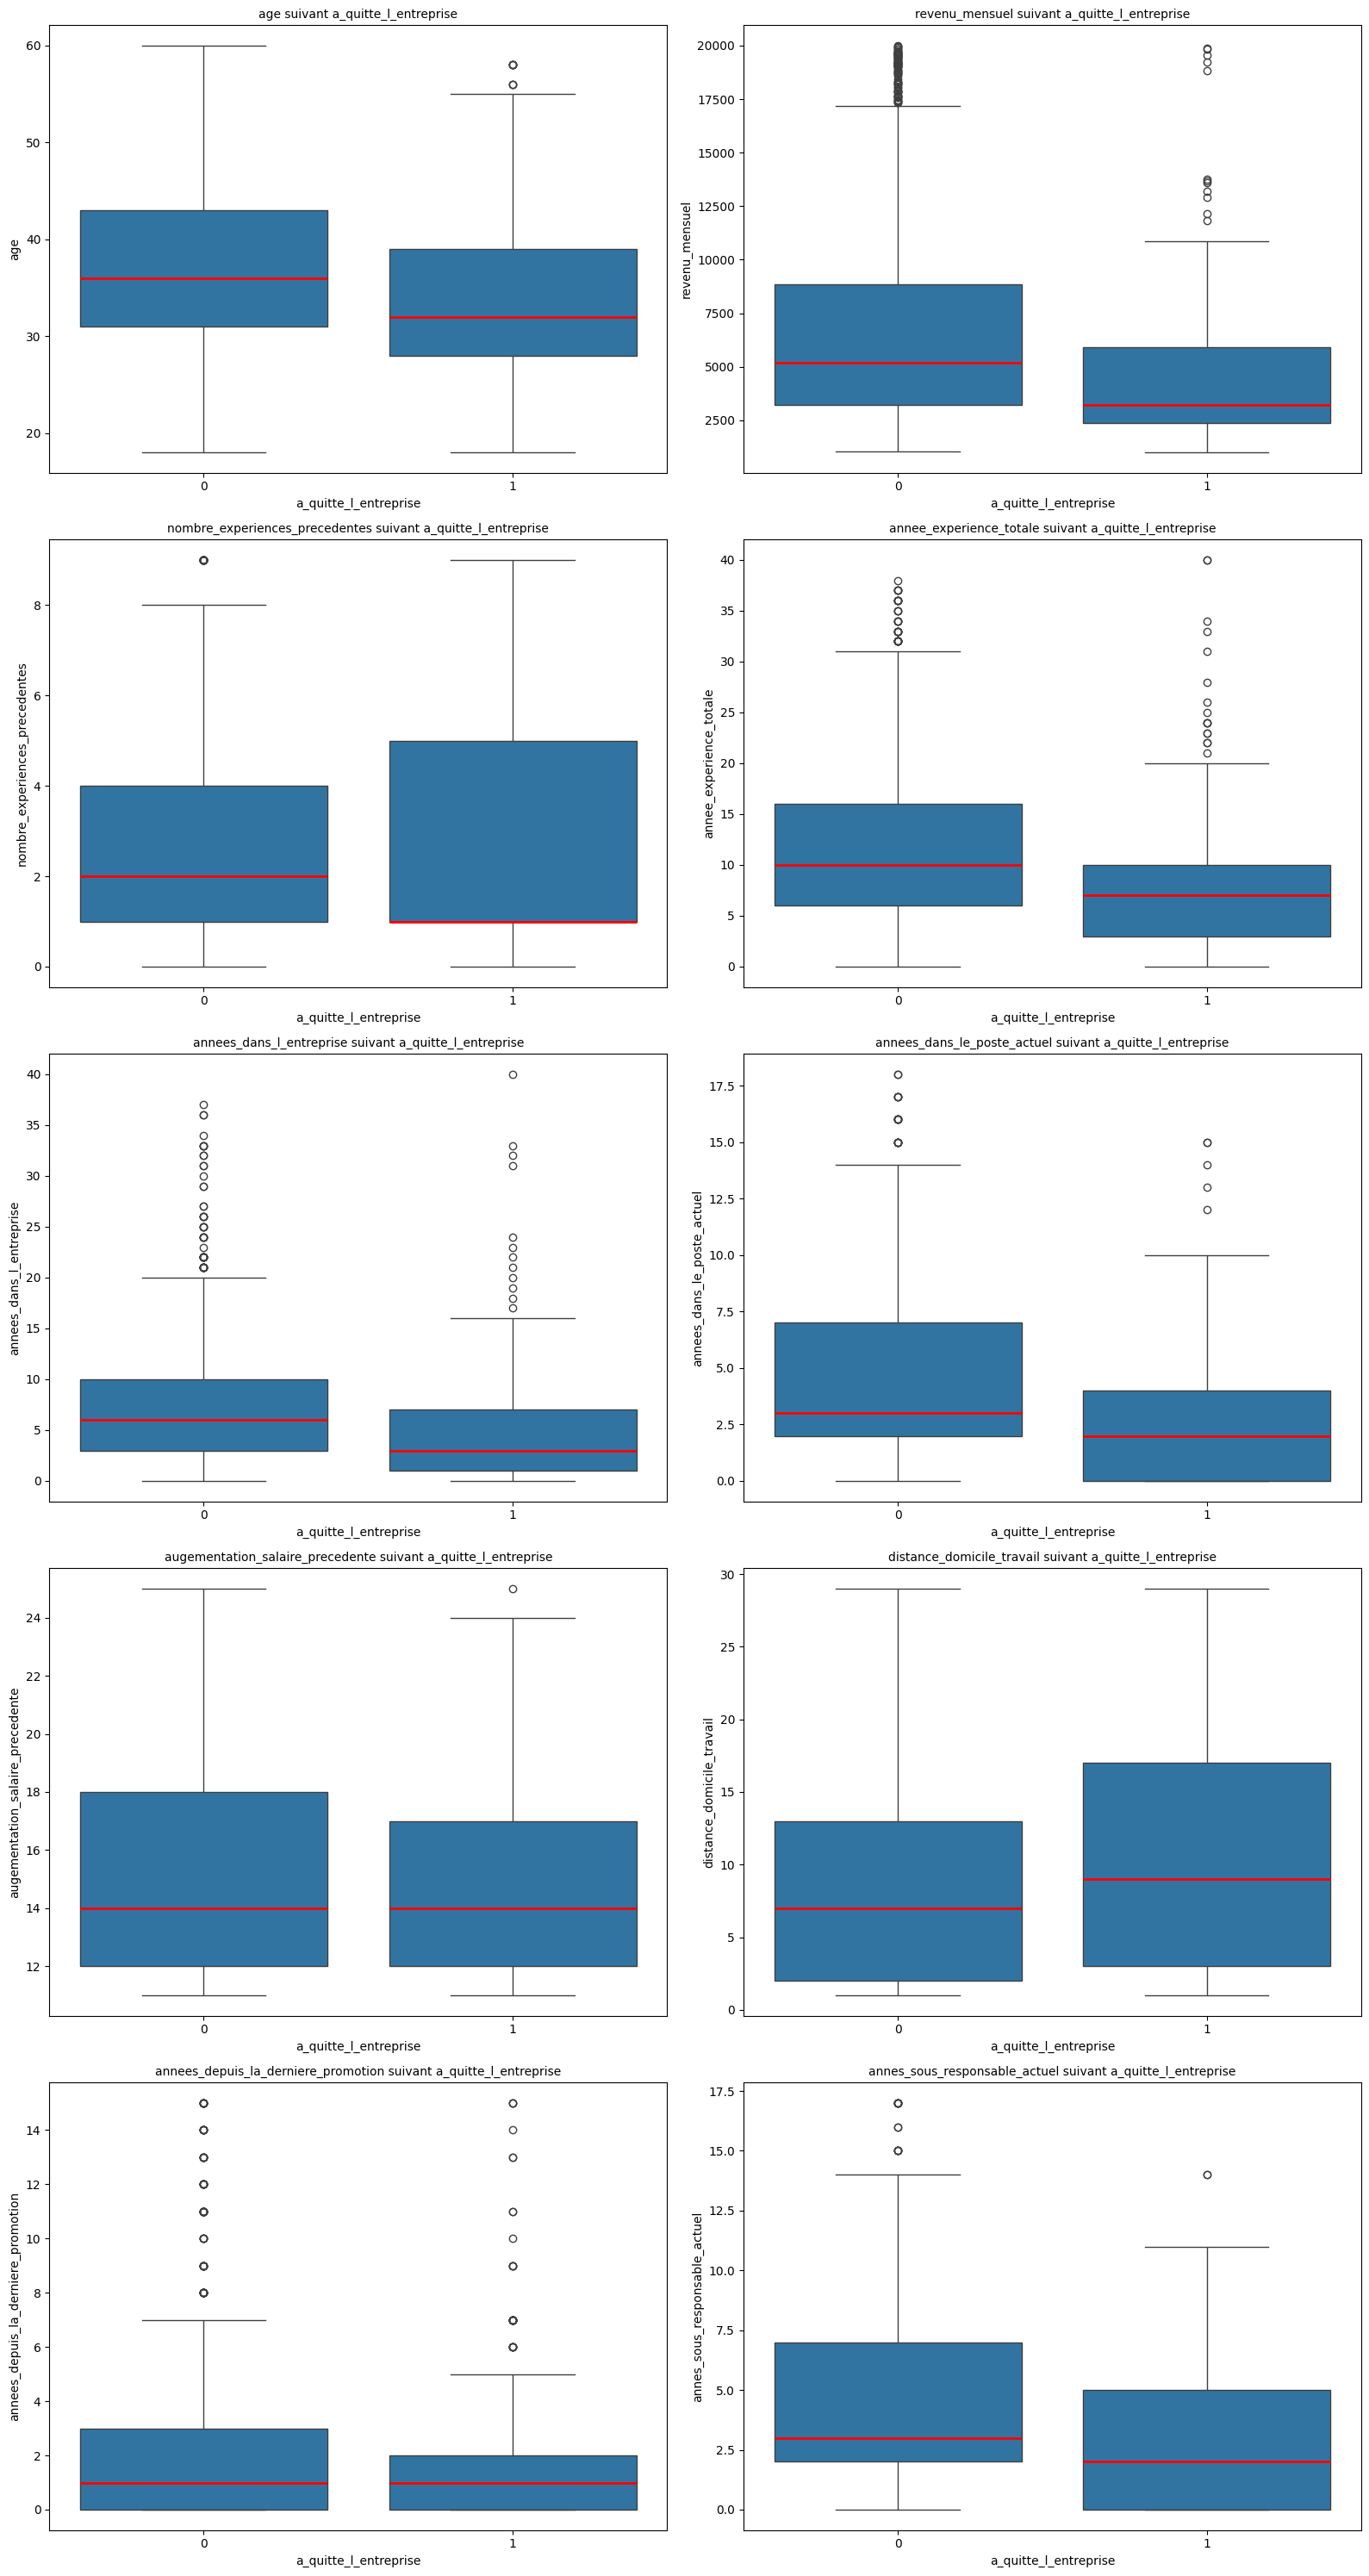

In [25]:
make_figure(
    df_central_clean,
    x='a_quitte_l_entreprise',
    kind='box',
    ycols=[
        'age',
        'revenu_mensuel',
        'nombre_experiences_precedentes',
        'annee_experience_totale',
        'annees_dans_l_entreprise',
        'annees_dans_le_poste_actuel',
        'augementation_salaire_precedente',
        'distance_domicile_travail',
        'annees_depuis_la_derniere_promotion',
        'annes_sous_responsable_actuel'
    ]#.select_dtypes(include=['int64', 'float64','int32', 'float32']).columns.tolist()
)
plt.show()

- L'iqr, le boxplot ( et le mad zscore) estiment qu'il y a des outliers dans la donnée, toujours côté droit (les valeurs elevées) et ce nombre semblent plus important parmis les démissionaires à propos du revenu mensuel.  

- Au vu du contexte, il est probable que ces outliers ne soit juste que de fortes disparités (sinon trésorerie en péril entre autre...), ces résultats font tout de même ressortir la présence de fortes disparités au niveau de l'ancienneté, la stagnation et le revenu.

<span style="color:blue;font-size:1.5em;font-weight:bold;background-color:yellow"> Autres erreurs </span>

In [26]:
# Doublons
df_central_clean.loc[df_central_clean.duplicated()]
# df_central_clean.loc[df_central_clean.duplicated(subset='id_employee')]
# Suppression
# df_central_clean.drop_duplicate()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel


- Pas de valeurs manquantes
- Pas d'Outliers
- Pas de doublons
- Pas d'erreur de contradiction
- Pas d'erreur de formatage
- Pas d'erreur d'irrégularité
- Pas d'erreur lexicale

<ul>
<span style="font-weight:bold">Le dataset est parfaitement *CLEAN*. Au final, on a juste pu faire relever les points suivants:</span>
<li><span style="color:darkgreen">La satisfaction employeur/employé ne semble pas être une root cause</span></li>
<li><span style="color:darkgreen">Forte disparité sur les salaires avec potentiellement stagnation et mauvaise revalorisation ainsi que sur l'ancienneté.</span></li>
<li><span style="color:darkgreen">(RGPD remis en question?)</span></li>
<li><span style="color:darkgreen">Pas de discrimination sur le groupe social (sexe, age, statut marital...)</span></li>
<li><span style="color:red">La cible sera "a_quitte_l_entreprise"</span></li>
</ul>

In [27]:
cleaning_step1 = cleaning_counter(df_central = df_central_clean)
cleaning_step1

{'df_central': (1470, 29)}

In [28]:
removed_col_list,added_col_list = removedAndAdded_col(
    df_before = df_central,
    df_after=df_central_clean
)

In [29]:
cleaning_results(before = cleaning_ref, after=cleaning_step1, removed_col=removed_col_list)
print(f'colonnes supprimées : \n{removed_col_list}')
print(f'colonnes ajoutées : \n{added_col_list}')

df_central: Supression de 0 lignes soit 0.0000% et 3 colonnes soit 8.8235% 
colonnes supprimées : 
['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'ayant_enfants']
colonnes ajoutées : 
[]


<span style="color:blue;font-size:1.5em;font-weight:bold;background-color:yellow"> Correlation, feature engineering et réduction de features  </span>

<span style="color:red;font-weight:bold;font-size:1.5em">A priori aucune des features ne présentent de data leakage possible avec la démission </span>

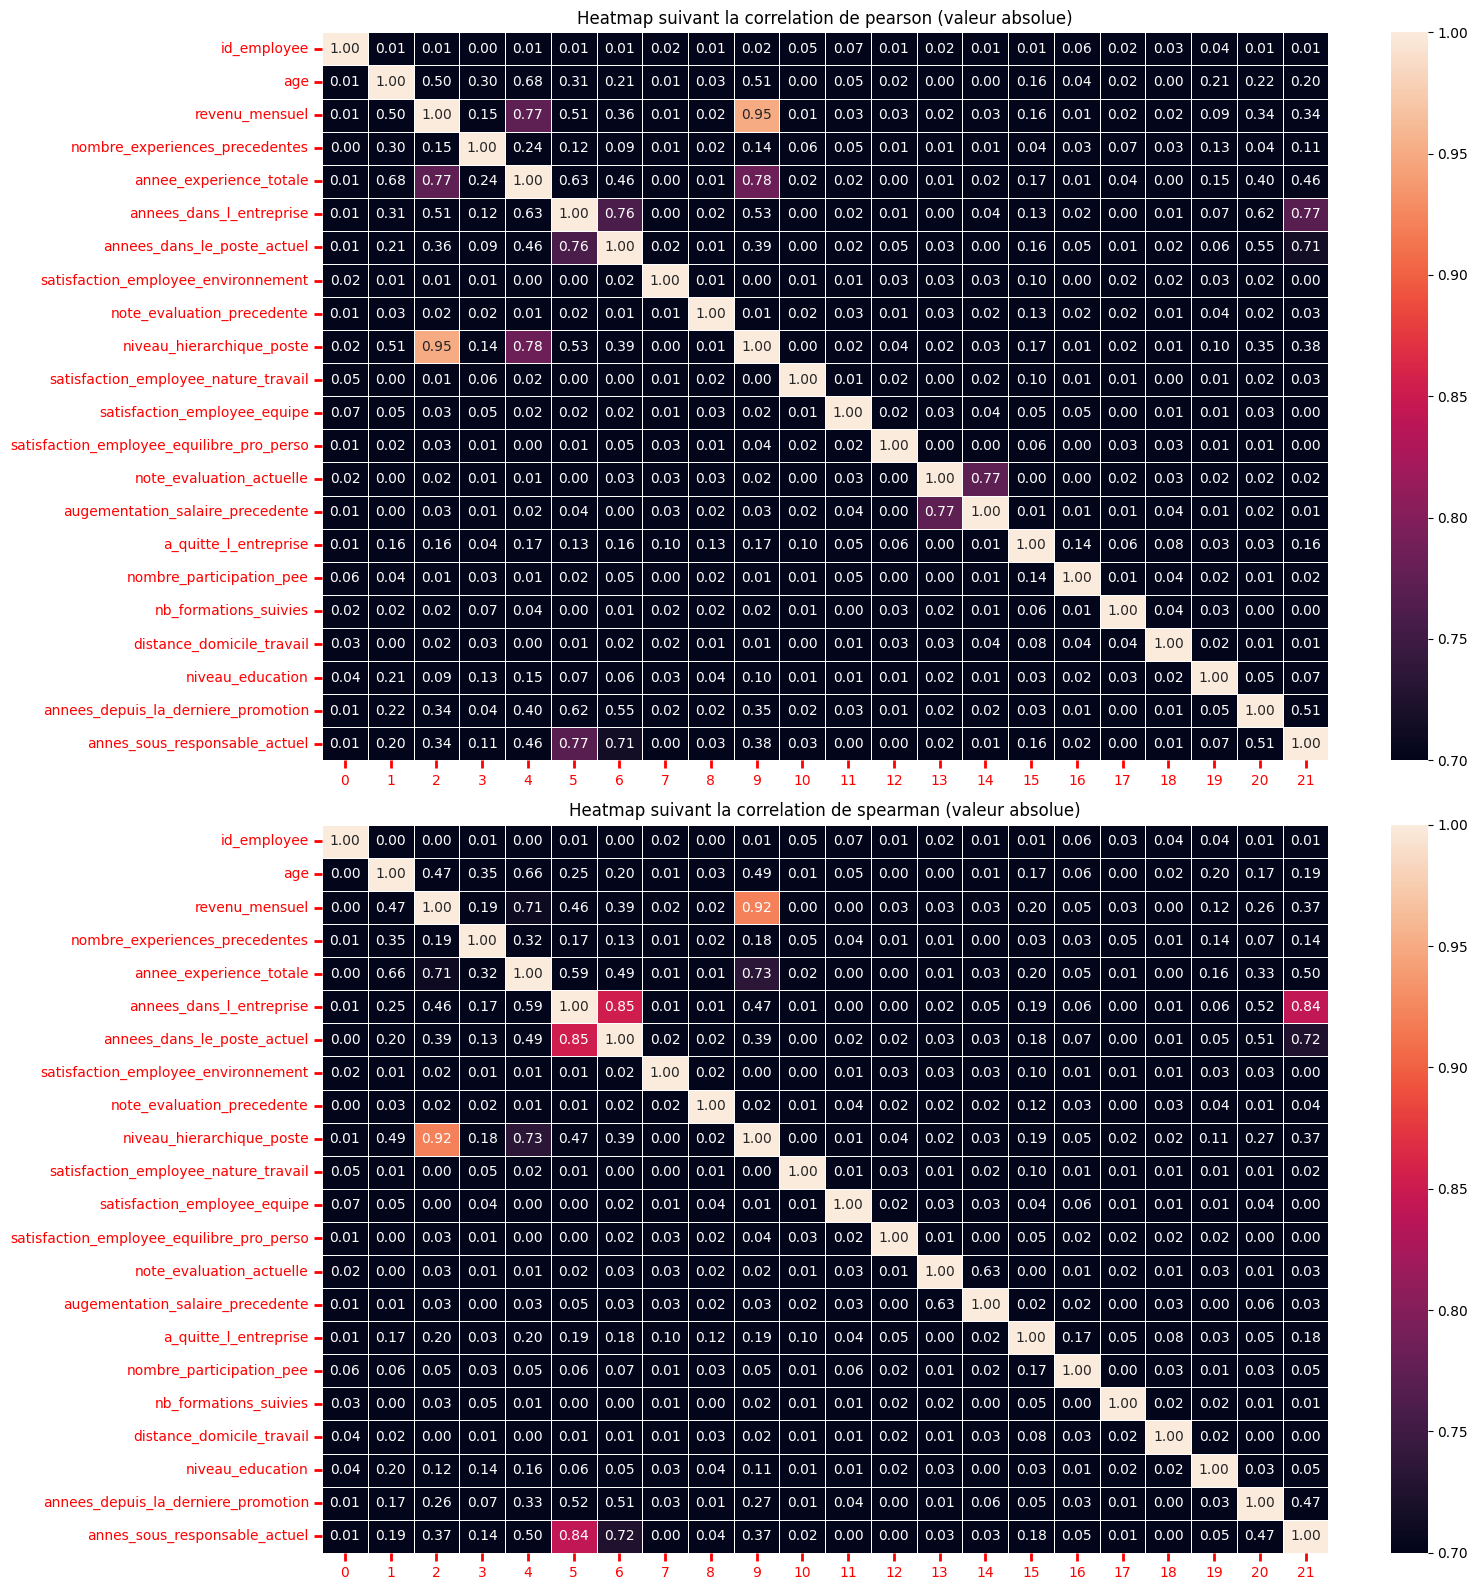

In [30]:
graphs_corr(
    data= df_central_clean, 
    vmin = 0.7, 
    vmax=1,
    title_save="Heatmap_clean", 
    save = save_graphs
)

pratiquement aucune features numériques n'a de correlation avec le départ...

In [31]:
chi2_test(
    data = df_central_clean,
    cat_list = df_central_clean.select_dtypes(exclude = ["int64","float64","int32","float32"]).columns.tolist(),
    alpha=0.05
)

====================Résultats pour le couple genre et statut_marital=================
stat de test: 3.5478394206821307
p-value: 0.1696666396487212
degré de liberté: 2
====================Résultats pour le couple genre et departement=================
stat de test: 2.9644916359463056
p-value: 0.22712702921028263
degré de liberté: 2
====================Résultats pour le couple genre et poste=================
stat de test: 16.029879046543474
p-value: 0.04195444216198653
degré de liberté: 8
****************H0 rejetée********************
chi2 critique: 15.50731305586545
V de Cramer: 0.10442547401615643
====================Résultats pour le couple genre et heure_supplementaires=================
stat de test: 2.397257813640345
p-value: 0.12154814754949847
degré de liberté: 1
====================Résultats pour le couple genre et domaine_etude=================
stat de test: 2.9414238793151792
p-value: 0.7090162522843912
degré de liberté: 5
====================Résultats pour le couple genre et fr

Seuil de V de Cramer à 0.5 (redondance X-X):
- departement et poste (V de Cramer = 0.94)
- departement et domaine_etude (V de Cramer = 0.59)

In [32]:
anova_test(
    data = df_central_clean,
    target = 'a_quitte_l_entreprise', 
    cat_list = df_central_clean.select_dtypes(exclude = ["int64","float64","int32","float32"]).columns.tolist(),
    alpha=0.05
)

====================Résultats pour le couple genre et a_quitte_l_entreprise=================
stat de test: 1.2745870687662169
p-value: 0.2590923641414023
====================Résultats pour le couple statut_marital et a_quitte_l_entreprise=================
stat de test: 23.781565468458172
p-value: 6.850067559825063e-11
****************H0 rejetée: calcul de eta2********************
eta2: 0.03140386159241407
====================Résultats pour le couple departement et a_quitte_l_entreprise=================
stat de test: 5.426843272582732
p-value: 0.004485674813058454
****************H0 rejetée: calcul de eta2********************
eta2: 0.007344222668306582
====================Résultats pour le couple poste et a_quitte_l_entreprise=================
stat de test: 11.374753732967815
p-value: 9.562555450860023e-16
****************H0 rejetée: calcul de eta2********************
eta2: 0.05863282563041111
====================Résultats pour le couple heure_supplementaires et a_quitte_l_entreprise===

Correlation entre la cible et les features catégorielles ==> modérée pour $\eta^2 = 0.06$ et forte pour $\eta^2 > 0.14$:
- poste ($\eta^2 \approx 0.059$)
- heure_supplementaires ($\eta^2 \approx 0.06$)

- Concernant les features numériques, les correlations observées sur la heatmap peuvent être réduit par feature engineering et suppression
- Au vu des résultats, on peut supprimer departement car poste est plus intéressant notamment avec sa correlation avec la démission et cela libère aussi domaine_etude.

In [33]:
df_central_engineering = df_central_clean.copy()

In [34]:
df_central_engineering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   annee_experience_totale                    1470 non-null   int64 
 9   annees_dans_l_entreprise                   1470 non-null   int64 
 10  annees_dans_le_poste_actuel         

In [35]:
# Investissement de l'employée dans l'entreprise ou non
df_central_engineering["evolution_note"] = \
df_central_engineering['note_evaluation_actuelle'] - df_central_engineering['note_evaluation_precedente']

In [36]:
# ratio de temps passé sans promotion (on ajoute +1 car anne depuis derniere promo < annee dans l'entreprise mais entreprise peut etre=0)
df_central_engineering["stagnation_promo"] = \
df_central_engineering['annees_depuis_la_derniere_promotion'] / (df_central_engineering['annees_dans_l_entreprise']+1)

In [37]:
# # ratio de temps passé même poste (on ajoute +1 car anne depuis derniere promo < annee dans l'entreprise mais entreprise peut etre=0)
# df_central_engineering["stagnation_poste"] = \
# df_central_engineering['nombre_experiences_precedentes'] / (df_central_engineering['annees_dans_l_entreprise']+1)

In [38]:
# Fréquence changement de poste.
df_central_engineering["freq_chgt_poste"] = \
df_central_engineering['annee_experience_totale'] / (df_central_engineering['nombre_experiences_precedentes']+1)

In [39]:
# Salaire ajusté au niveau hierarchique
df_central_engineering["revenu_mensuel_ajuste_par_nv_hierarchique"] = \
df_central_engineering['revenu_mensuel'] / df_central_engineering['niveau_hierarchique_poste']

In [40]:
# Salaire ajusté au niveau d'xp total. 
df_central_engineering["revenu_mensuel_par_annee_xp"] = \
df_central_engineering['revenu_mensuel'] / (df_central_engineering['annee_experience_totale']+1)

In [41]:
# Ancienneté management. Fillna = 0 car si annee dans l'entreprise = 0, ratio anciennete doit aussi valoir 0
df_central_engineering["freq_chgt_responsable"] = \
(df_central_engineering['annes_sous_responsable_actuel'] / df_central_engineering['annees_dans_l_entreprise']).fillna(0)

In [42]:
# Satisfaction globale employe
df_central_engineering["satisfaction_globale_employee"] = \
df_central_engineering[[
    'satisfaction_employee_environnement',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso'
    ]].sum(axis=1)

In [43]:
df_central_engineered = df_central_engineering.drop(columns=([
    'id_employee',
    'departement',
    'note_evaluation_actuelle',
    'note_evaluation_precedente',
    'annees_depuis_la_derniere_promotion',
    'annees_dans_l_entreprise',
    # 'revenu_mensuel',
    'niveau_hierarchique_poste',
    'annee_experience_totale',
    'annes_sous_responsable_actuel',
    'satisfaction_employee_environnement',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso',
    'nombre_experiences_precedentes',
]))

In [44]:
df_central_engineered

,age,genre,revenu_mensuel,statut_marital,poste,annees_dans_le_poste_actuel,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,...,niveau_education,domaine_etude,frequence_deplacement,evolution_note,stagnation_promo,freq_chgt_poste,revenu_mensuel_ajuste_par_nv_hierarchique,revenu_mensuel_par_annee_xp,freq_chgt_responsable,satisfaction_globale_employee
0,41,f,5993,célibataire,cadre commercial,4,oui,11,1,0,...,2,infra & cloud,occasionnel,0,0.000000,0.888889,2996.500000,665.888889,0.833333,8
1,49,m,5130,marié(e),assistant de direction,7,non,23,0,1,...,1,infra & cloud,frequent,2,0.090909,5.000000,2565.000000,466.363636,0.700000,12
2,37,m,2090,célibataire,consultant,0,oui,15,1,0,...,2,autre,occasionnel,1,0.000000,1.000000,2090.000000,261.250000,0.000000,12
3,33,f,2909,marié(e),assistant de direction,7,oui,11,0,0,...,4,infra & cloud,frequent,0,0.333333,4.000000,2909.000000,323.222222,0.000000,13
4,27,m,3468,marié(e),consultant,2,non,12,0,1,...,1,transformation digitale,occasionnel,0,0.666667,0.600000,3468.000000,495.428571,1.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,m,2571,marié(e),consultant,2,non,17,0,1,...,2,transformation digitale,frequent,-1,0.000000,3.400000,1285.500000,142.833333,0.600000,13
1466,39,m,9991,marié(e),manager,7,non,15,0,1,...,1,transformation digitale,occasionnel,1,0.125000,1.800000,3330.333333,999.100000,1.000000,9
1467,27,m,6142,marié(e),tech lead,2,oui,20,0,1,...,3,infra & cloud,occasionnel,0,0.000000,3.000000,3071.000000,877.428571,0.500000,9
1468,49,m,5390,marié(e),cadre commercial,6,non,14,0,0,...,3,transformation digitale,frequent,1,0.000000,5.666667,2695.000000,299.444444,0.888889,12


In [45]:
# Verifier u'il n'y ait pas de NaN ou de inf
# df_central_engineered.loc[(df_central_engineered.isna().any(axis=1)) | (df_central_engineered.isin([np.inf,-np.inf]).any(axis=1))]

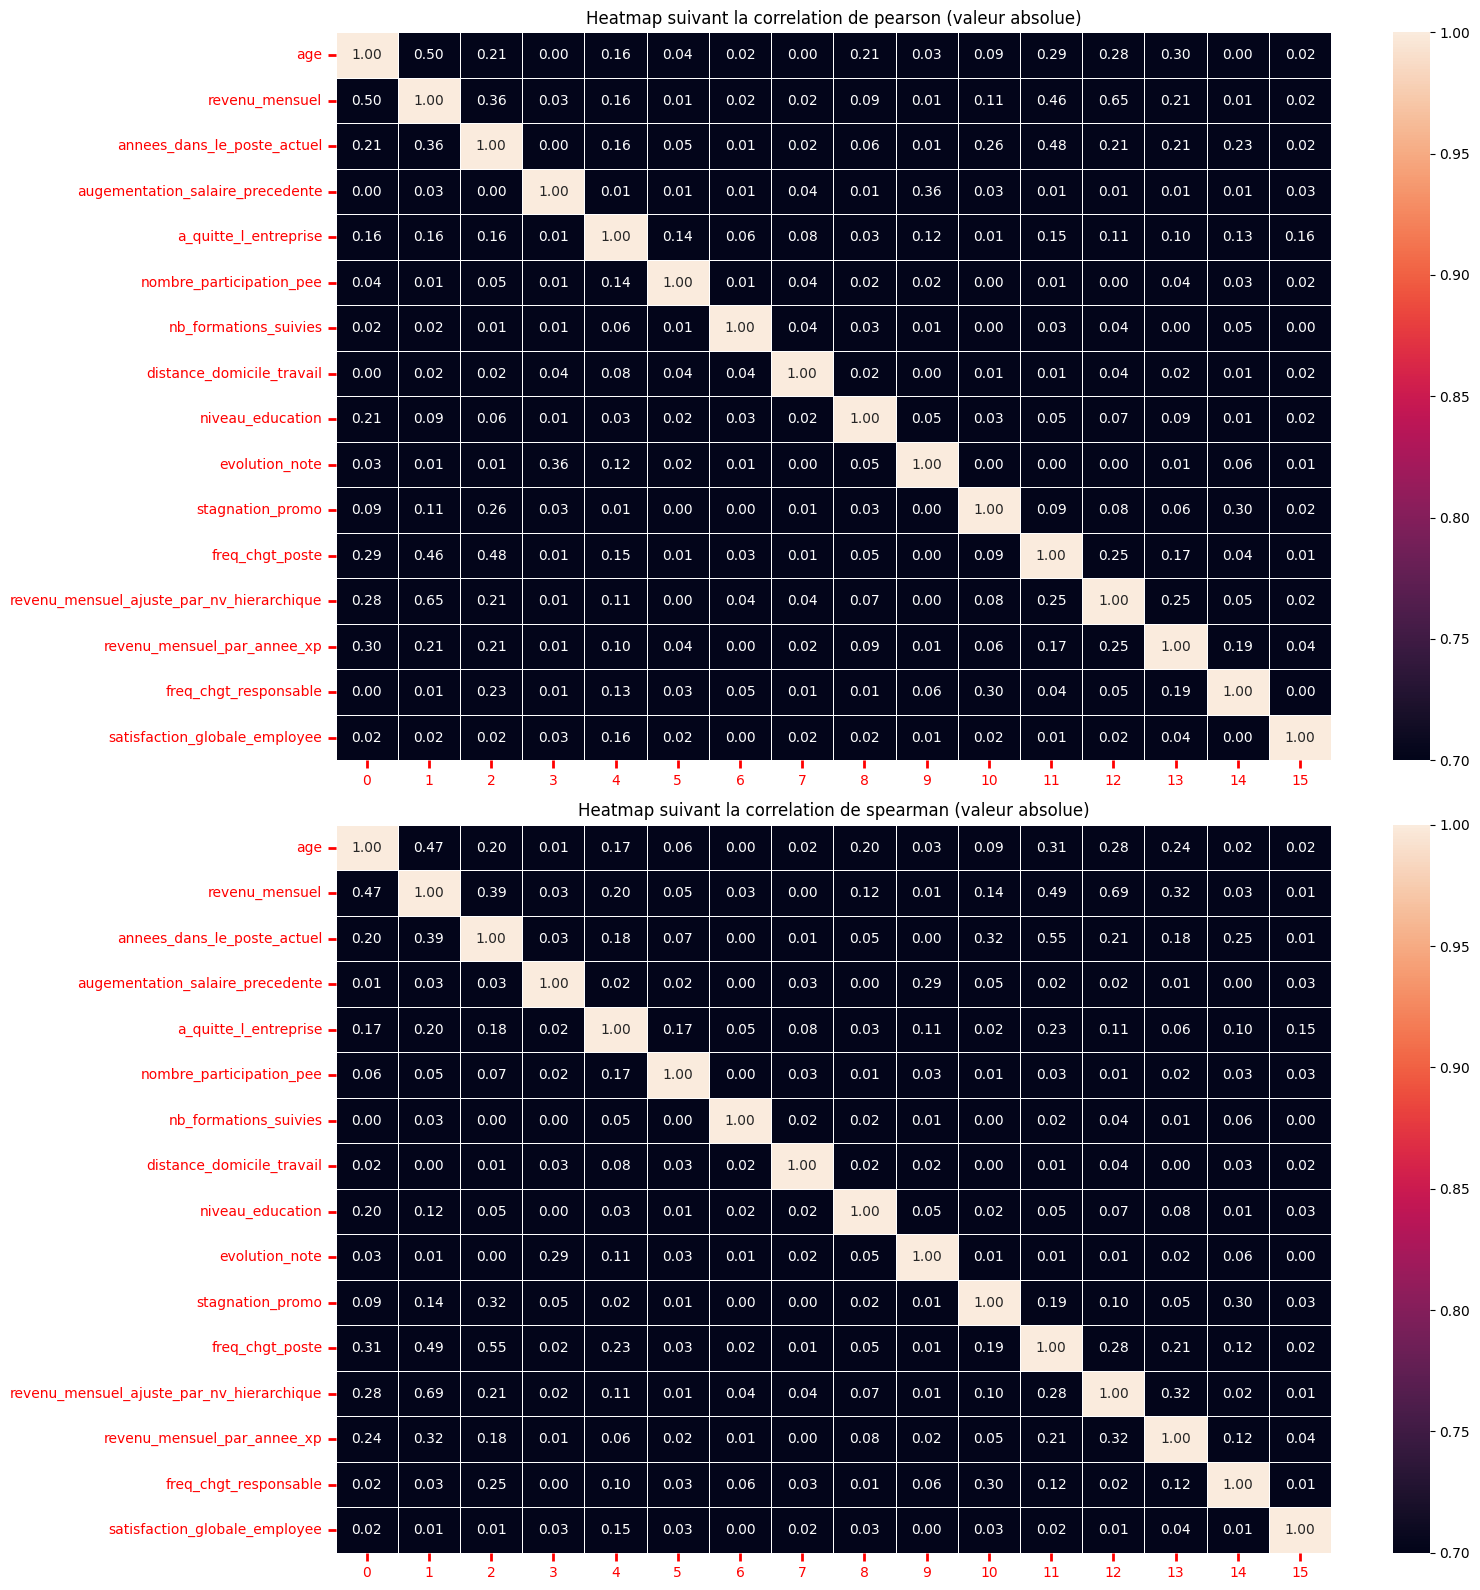

In [46]:
graphs_corr(
    data= df_central_engineered, 
    vmin = 0.7, 
    vmax=1,
    title_save="Heatmap2_after_engineering", 
    save = save_graphs
)

On a retiré les redondances mais les features restent très peu voir quasiment pas corrélés avec la cible, en tout cas pas de relation linéaire (logique, on a une cible binaire). On observe globalement une répartition indépendante des features avec tout de même un effet avec le revenu mensuel et le nombre d'année passé sur le même poste. En effet, la majeur partie des gens ayant le plus long temps passé sur le même poste nt une tendance à rester comparativement à leur pairs tandis que pour les salaire, on une tranche de salaire parmis les plus elevés sans être les plus elevés mais aussi de la médiane qui ne semblent pas être enclin à la démission.

On va créer une df allégée qui ne contiendrait qu'un nombre très limité de features ***(et on la comparera avec df_central_engineered si on le temps afin d'observer si la suppression de ces features à fortement dégradé ou non l'entrainement)***  
<span style='color:red'>On va considérer que toutes les correlation inférieure à 0.1 (spearman) avec la target sont inutiles</span>

<span style = 'color:red;font-size:1.5em;font-style:italic' > Sauvegarde du dataset de modélisation </span>

In [56]:
if save_datas in yes_choice:
    df_central_engineered.to_csv(save_path.joinpath('Xy.csv'),index=False)